# 오픈 API를 이용한 웹페이지 크롤링

### 오픈 API란?

- 크롤링은 하면 웹사이트에 과부하가 생기므로 이를 방지하는 차원에서 크롤링을 막는 경우가 있음
- 오픈 API를 사용하여 원하는 정보를 얻을 수 있게 도와 줌

- API : Application Programming Interface
    - 사전적정의 : 운영체제나 프로그래밍 언어가 제공하는 기능을 응용프로그램에서 사용 또는 제어할 수 있도록 만든 인터페이스

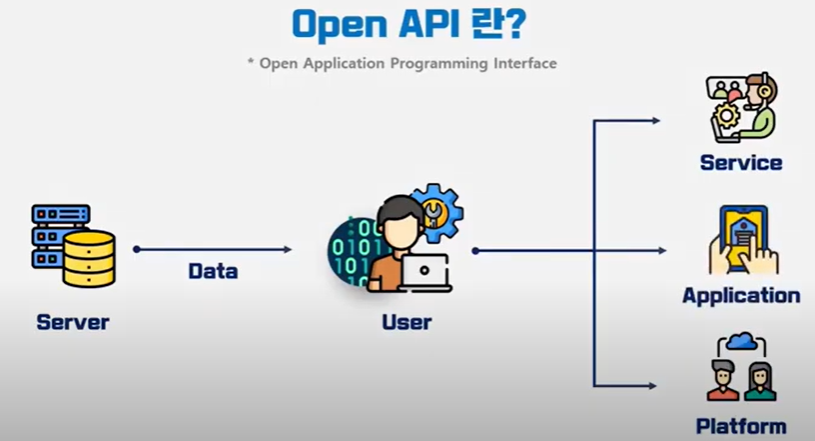

*출처: 공공데이터활용지원센터, https://www.youtube.com/watch?v=pe5-RQb-OPI

### 공공데이터 포털 사이트(http://data.go.kr)

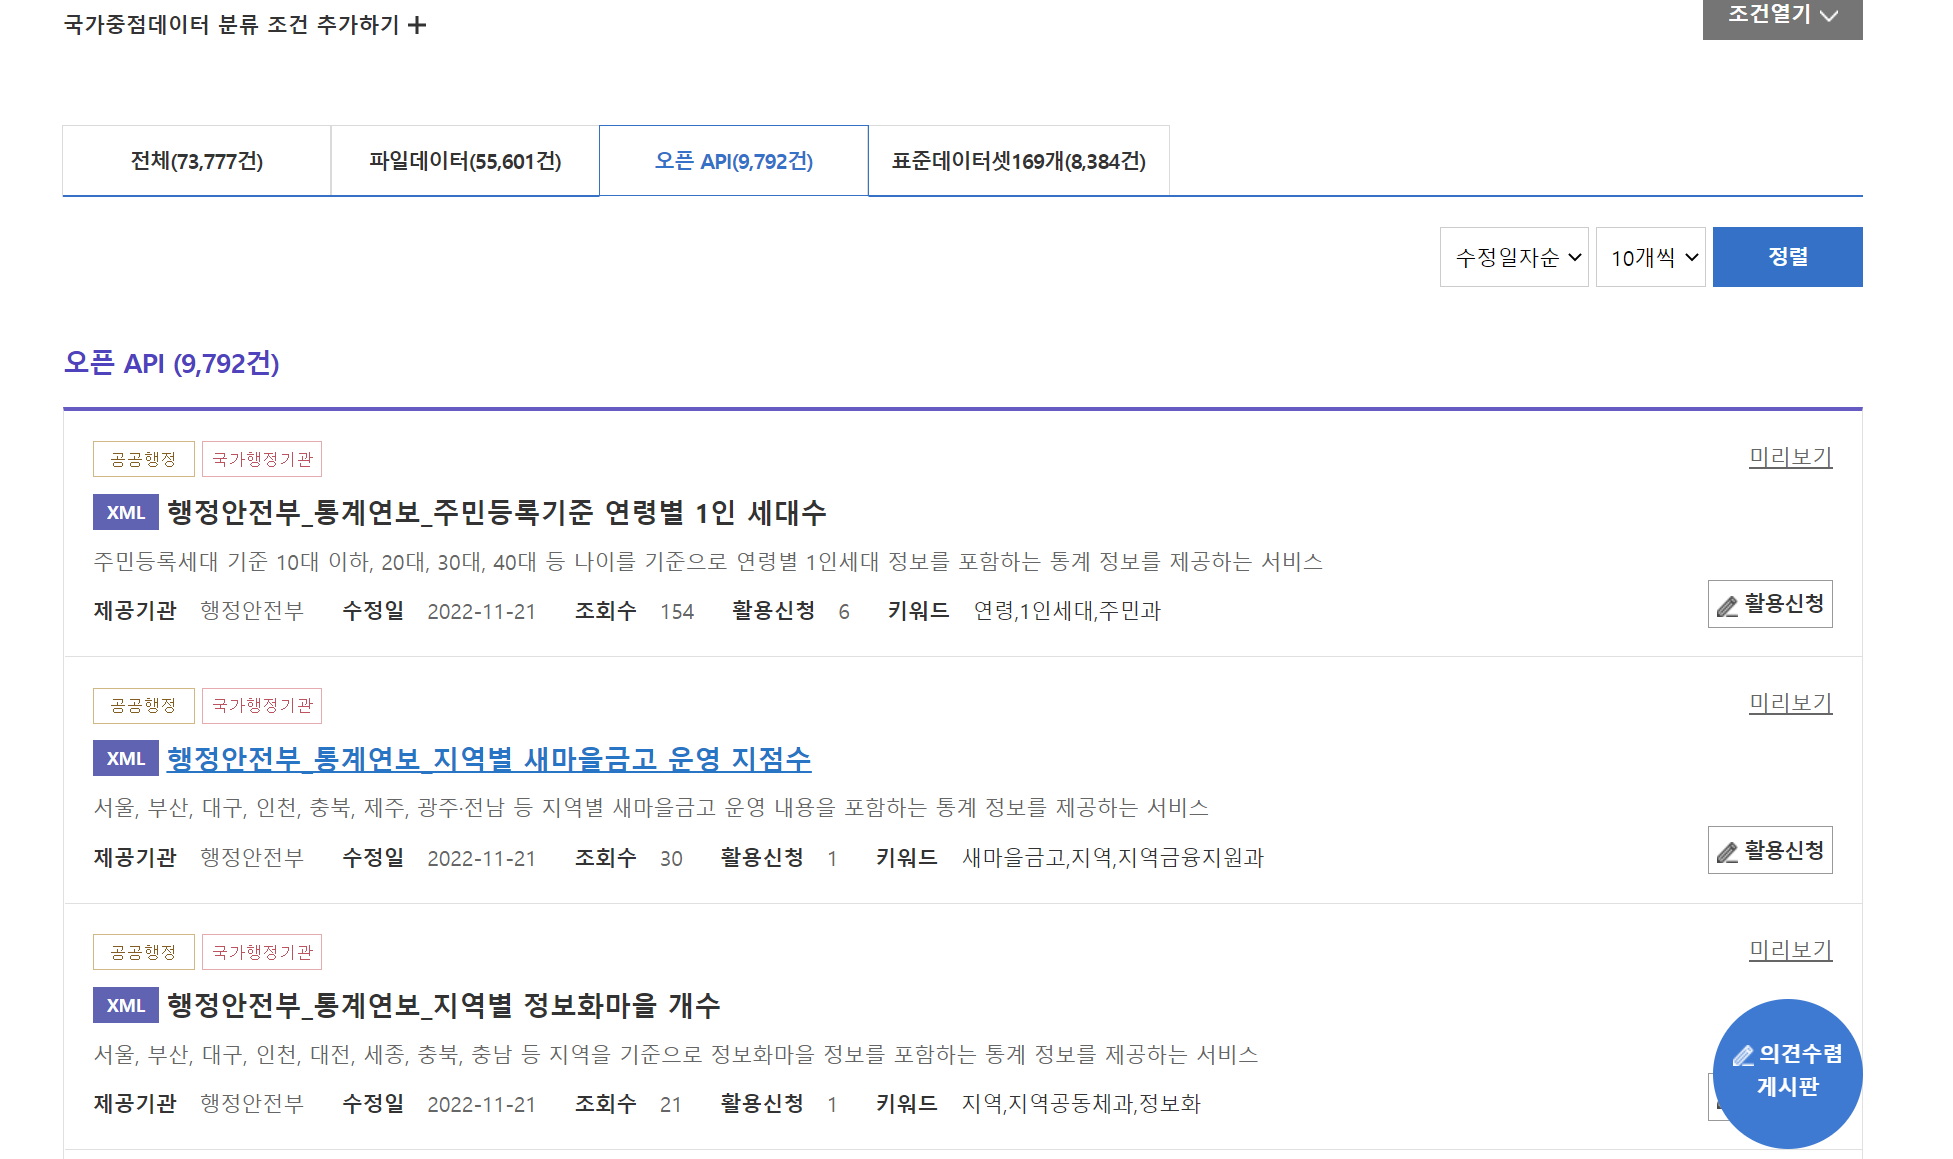

### 공공데이터 포털의 오픈API 사용과정

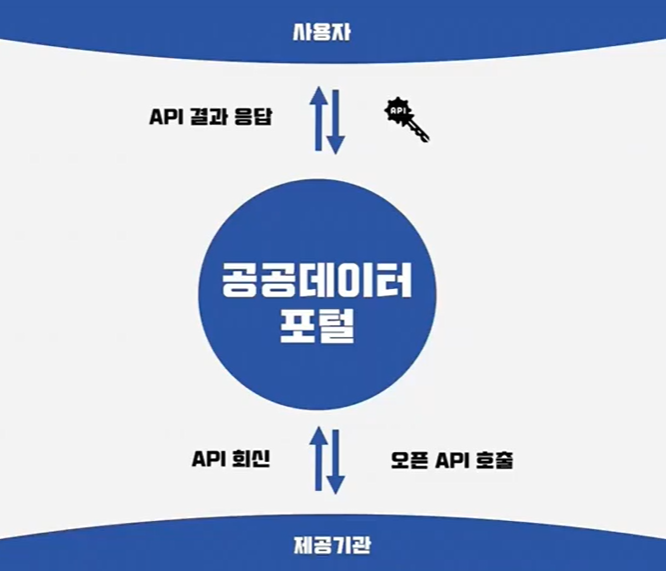

## 실습. 부동산 데이터 웹크롤링

https://www.data.go.kr/data/15099361/openapi.do

### 1.  공공데이터 포털사이트에서 API 등록하기

1. 회원가입 : 오픈 API 사용을 위해 회원가입
    
2. 로그인

3. data.go.kr 검색란에서 '부동산 거래 통계 조회 서비스' 입력

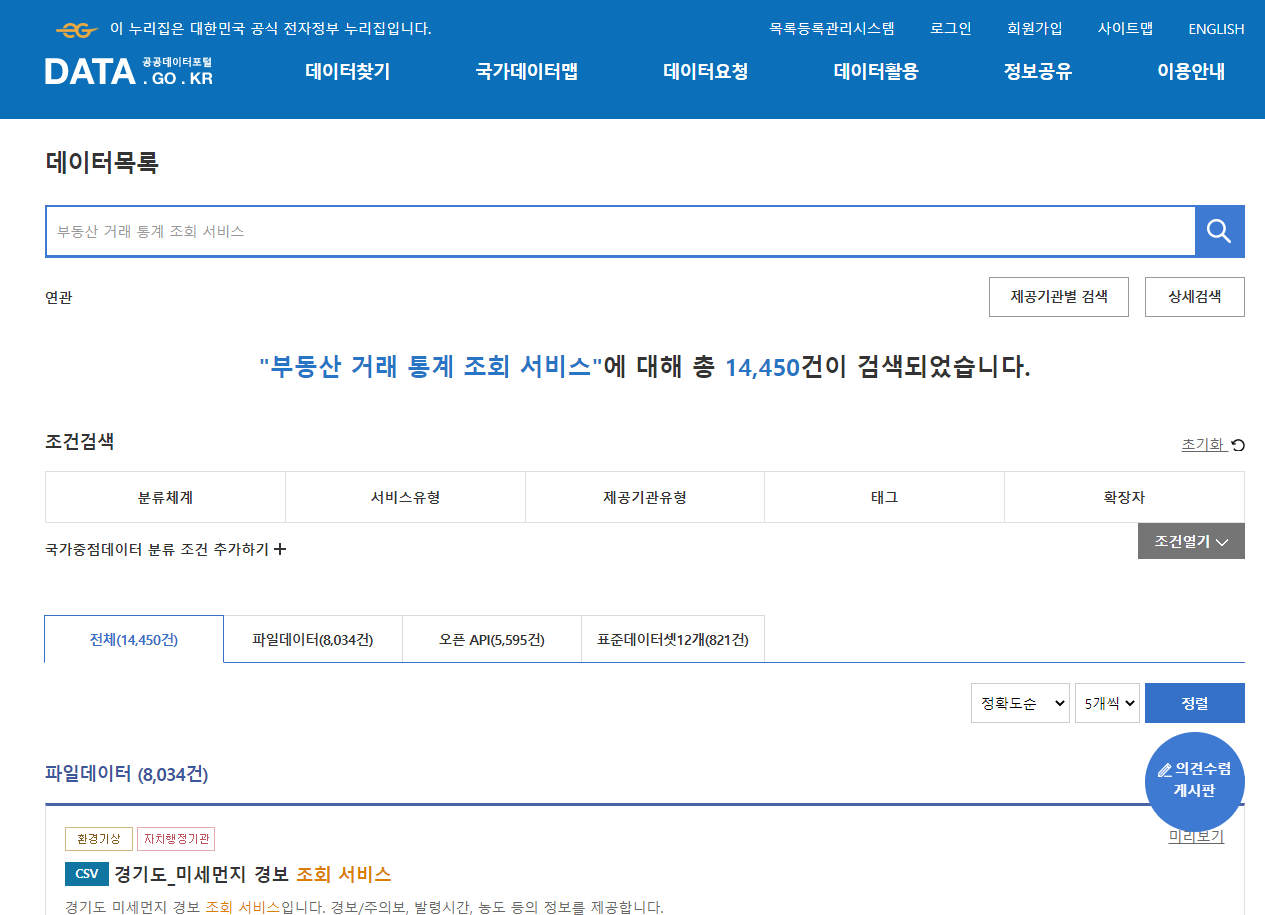

4. 검색 결과 중 [오픈API]에서 **'한국부동산원_부동산 거래 통계 조회 서비스'** 선택한 후 **<활용신청>**버튼을 클릭

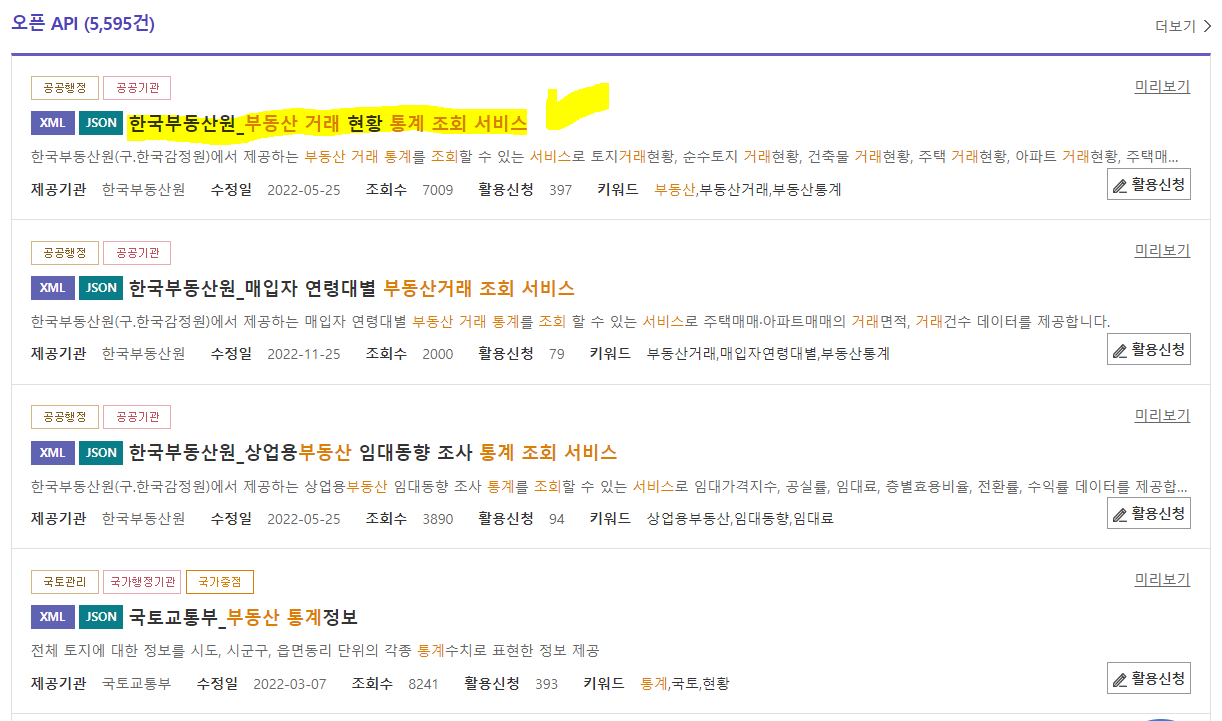

5. 활용신청 페이지에서 **활용목적을 입력**하고 **'동의합니다'체크** 후 **<활용신청>버튼** 클릭

6. [마이페이지]로 이동하여 **[오픈API]-[인증키 발급현황]** 메뉴 클릭
    - API를 사용하기 위해 필요한 인증키임

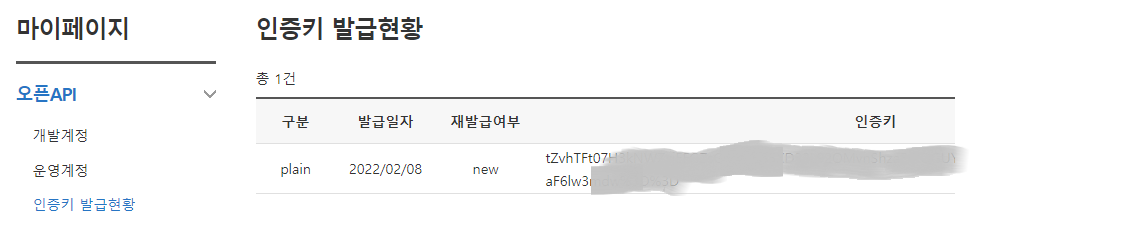

7. [마이페이지]로 이동하여 승인된 목록에서 **[부동산 거래현황 통계조회서비스]** 를 클릭

- 서비스 정보 확인

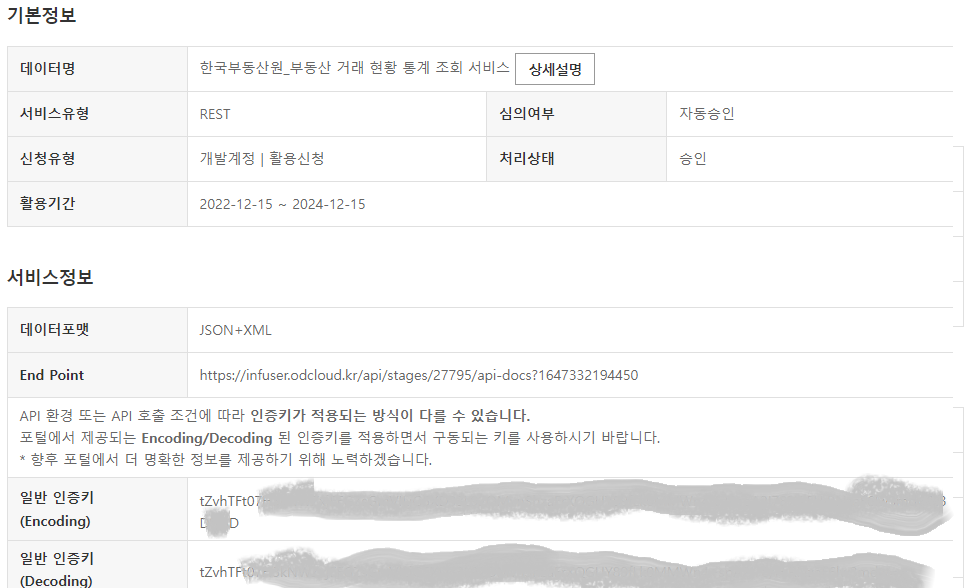

8. **[기본정보]** 의 **<상세설명>** 버튼을 클릭하여 '부동산 거래현황 통계조회서비스' 상세페이지로 이동

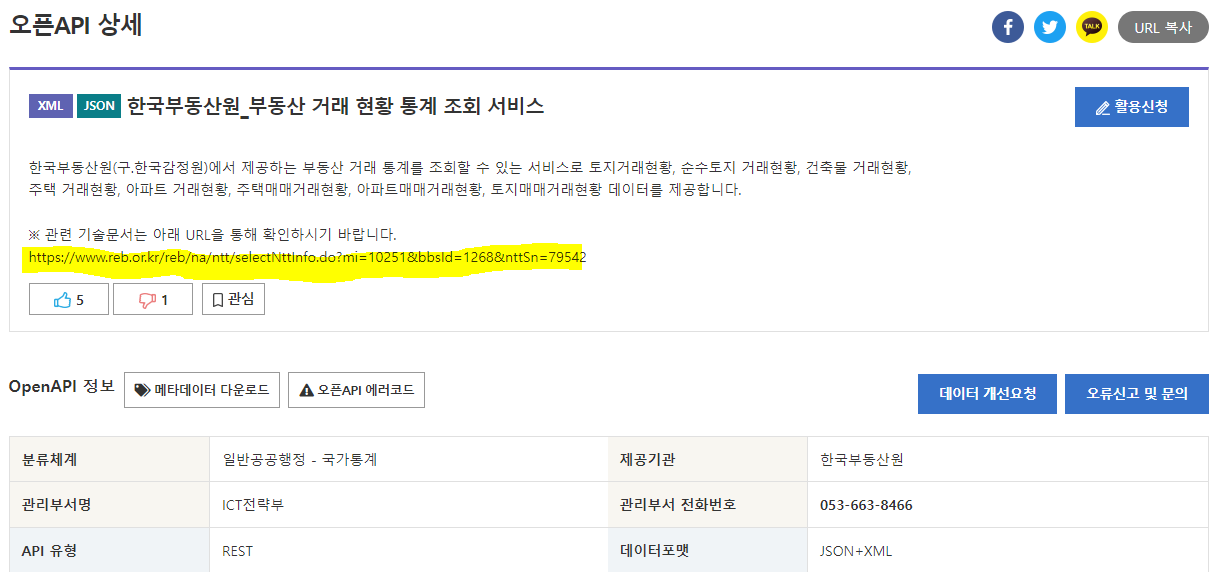

9. 오픈API상세 페이지에서 **관련기술문서 링크**를 웹페이지에 입력하여 해당 문서를 다운로드함

https://www.reb.or.kr/reb/na/ntt/selectNttInfo.do?mi=10251&bbsId=1268&nttSn=79542 

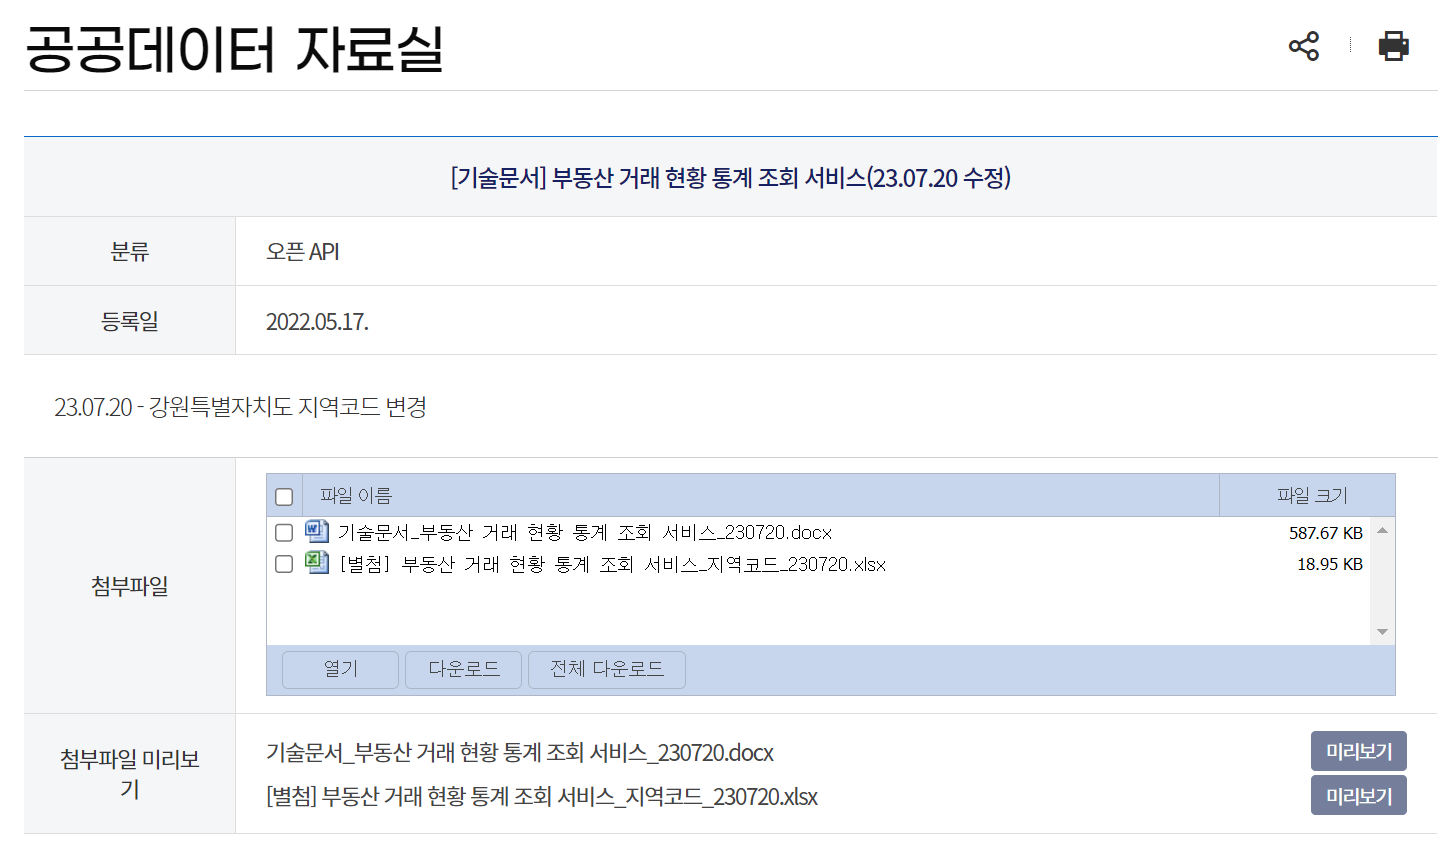

### 2. API 사용하기

#### 실습예제1.  '연도별 부동산 거래건수 조회' 데이터 크롤링

#### 1) [부동산 거래현황 통계조회서비스] 기술문서를 참고하여 api 요청/응답 테스트

- '24 연도별 부동산 거래 건수 조회'를 찾아서 요청메세지 예제 코드를 복사하여 웹브라우저 주소창에 넣고 서비스 키를 뒤에 붙여 클릭하여 응답 메시지 결과대로 나오는지 확인

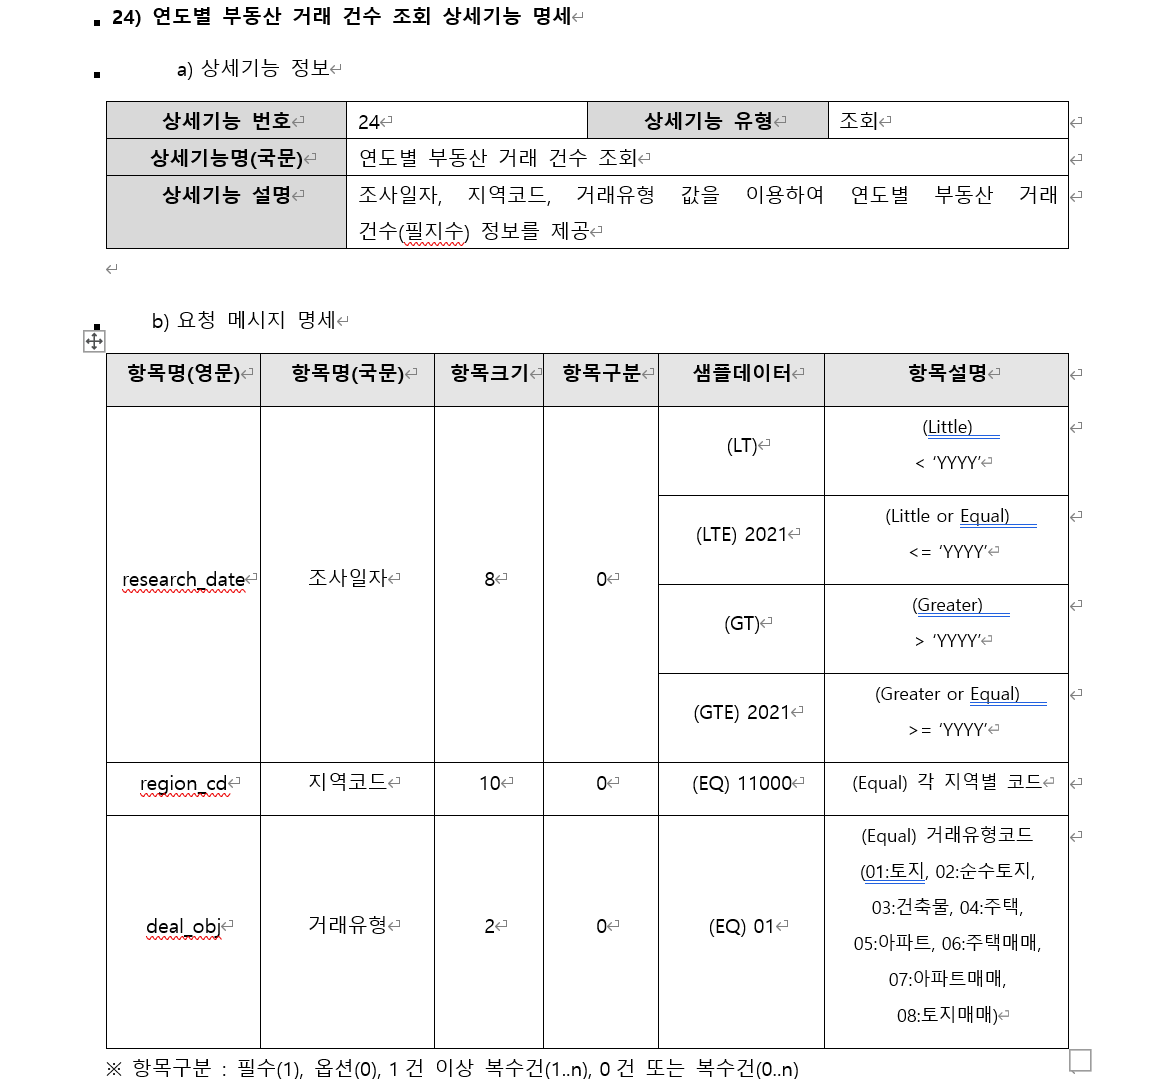

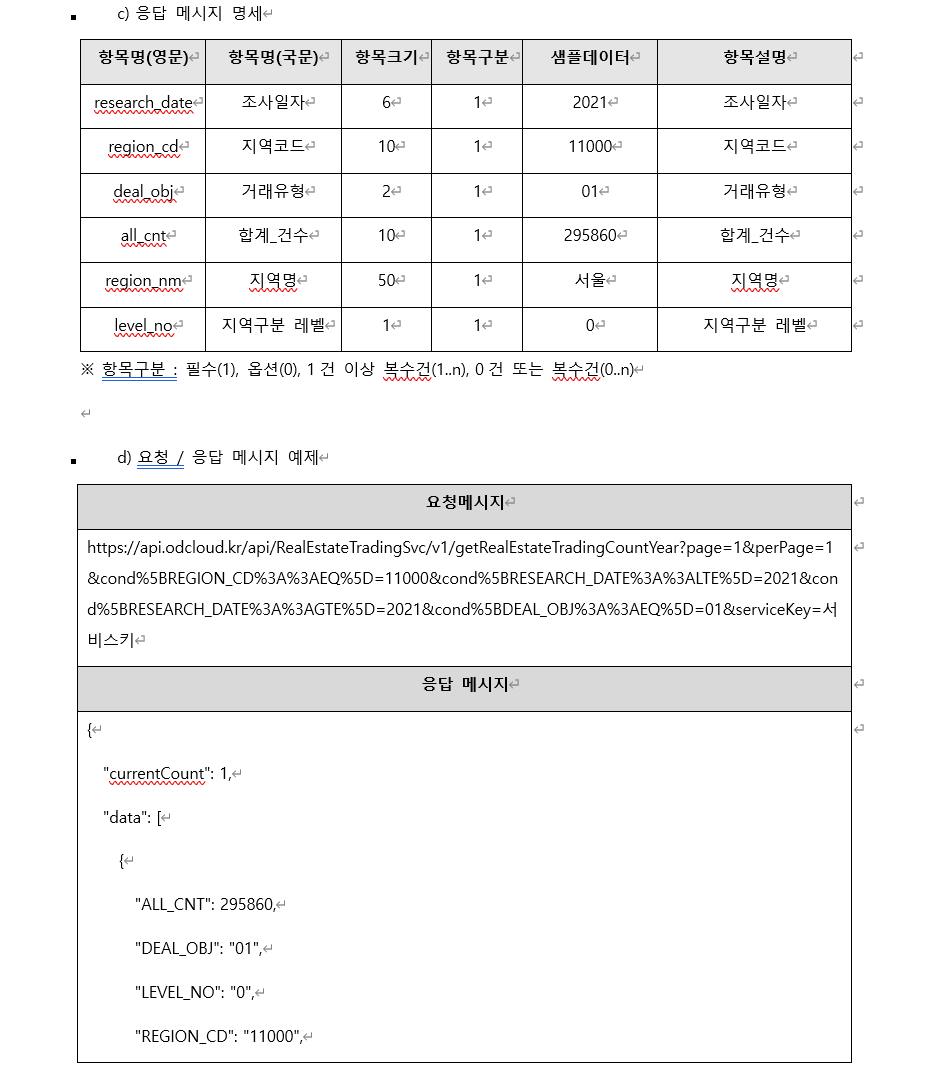

#### 2. **[부동산 거래현황 통계조회서비스]** 페이지에서 아래로 스크롤하여 **'활용신청 상세기능정보'** 항목
- 모든 부동산 정보가 나열되어 있음
- '연도별 부동산 거래 건수 조회'를 클릭하여 입력 매개변수와 값을 확인

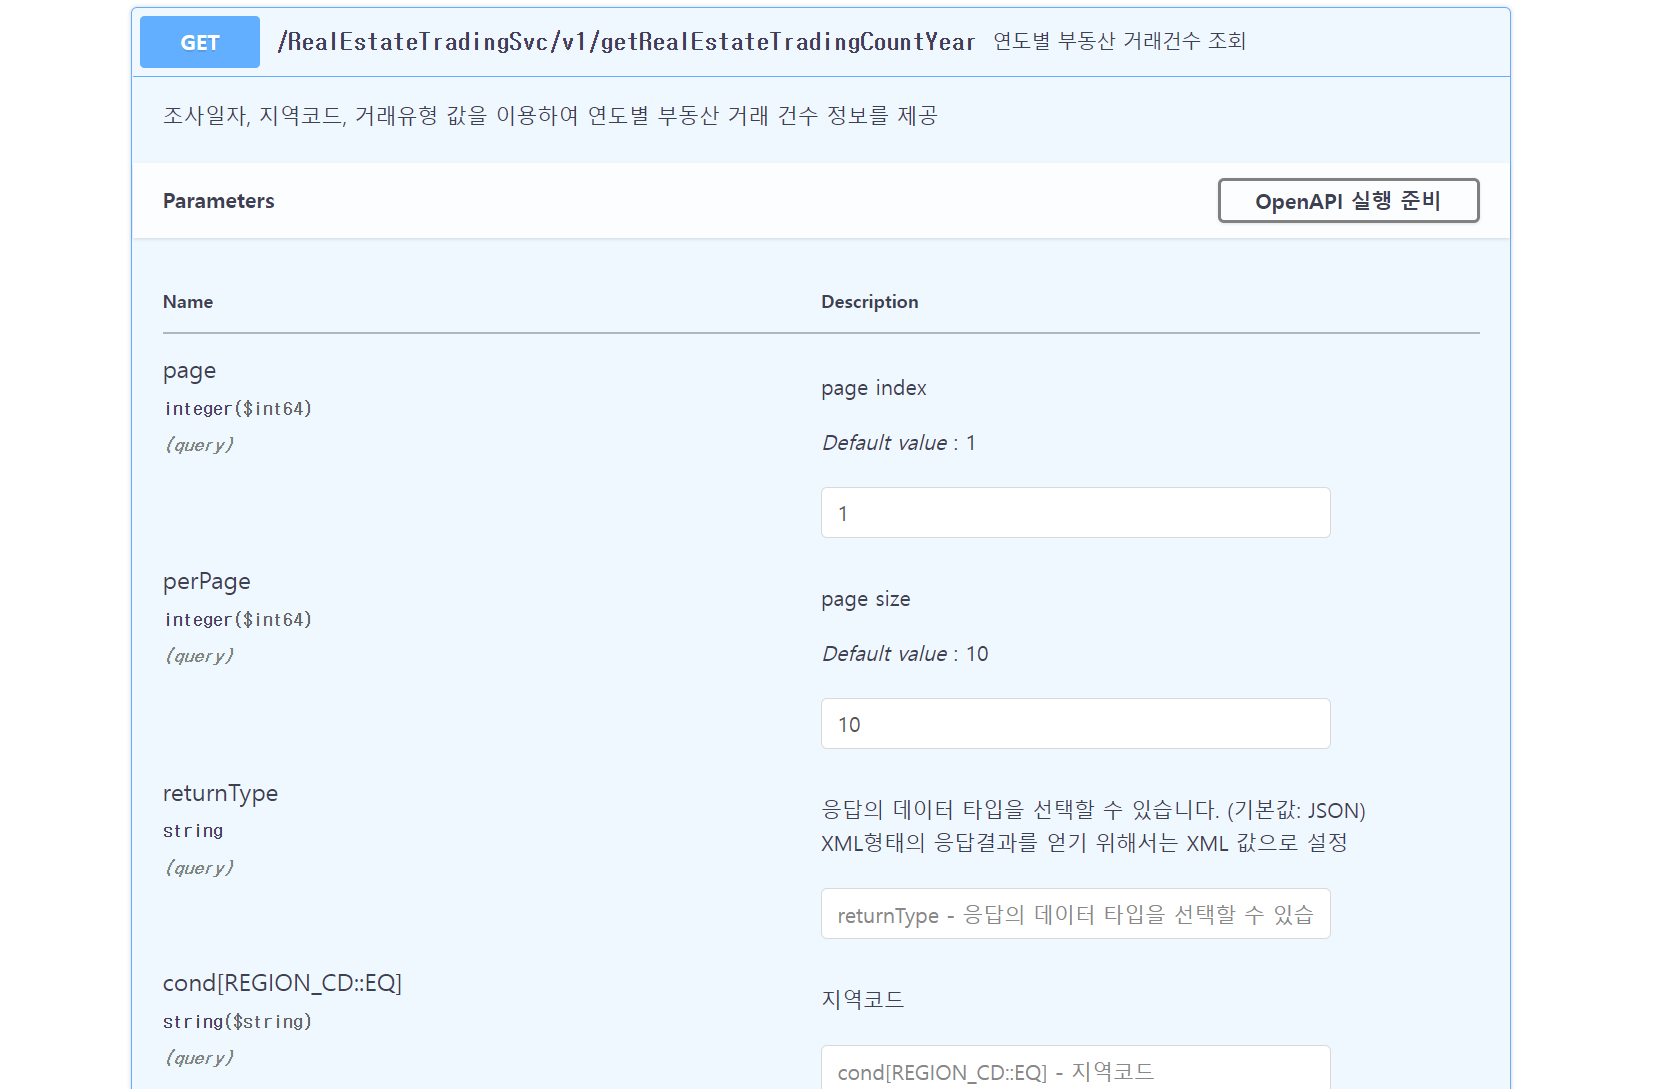

In [61]:
#참고용(Do Not Run)
https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCountYear?
page=1&perPage=20&returnType=XML&
cond%5BRESEARCH_DATE%3A%3ALTE%5D=2022&
cond%5BRESEARCH_DATE%3A%3AGTE%5D=2018&
cond%5BDEAL_OBJ%3A%3AEQ%5D=05

In [ ]:
#참고용(Do Not Run)
https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCountYear?
page=1&
perPage=20&
returnType=XML&
cond[BRESEARCH_DATE::LTE]=2022&
cond[BRESEARCH_DATE::GTE]=2018&
cond[BDEAL_OBJ::EQ]=05
serviceKey='cu%2Fvd1yTPiOwWiOGHM7joZnZtoybSJqhZuz5TwGib57IeNRYVsfCPOJTccdVOG6TVdwaMmnArC%2Bbr69TOtACJA%3D%3D'

### [실습코드] BeautifulSoup을 이용한 크롤링

In [12]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

#### 크롤링할 API 요청하기

##### 연도별 부동산거래건수 조회 API 사용
- 2019년~2022년 종로구 아파트거래현황 데이터
- API 이름 : '/RealEstateTradingSvc/v1/getRealEstateTradingCountYear'

- API 요청 준비: 파라미터와 서비스키

In [ ]:
baseurl = 'https://api.odcloud.kr/api/'
service = 'RealEstateTradingSvc/v1/getRealEstateTradingCountYear?'

returnType = 'XML'   # 'JSON' | 'XML'
page =1
perPage =10
regionCD = '11110'   # 종로구
start = '2019'
end = '2022'
#거래유형(01:토지, 02:순수토지, 03:건축물, 04:주택, 05:아파트, 06:주택매매, 07:아파트매매, 08:토지매매)
obj_type = '05' 
serviceKey ='cu%2Fvd1yTPiOwWiOGHM7joZnZtoybSJqhZuz5TwGib57IeNRYVsfCPOJTccdVOG6TVdwaMmnArC%2Bbr69TOtACJA%3D%3D'

In [ ]:
url = baseurl + service
url += f'returnType={returnType}&'
url += f'page={page}&'
url += f'perPage={perPage}&cond[REGION_CD::EQ]={regionCD}&cond[RESEARCH_DATE::LTE]={end}&'
url += f'cond[RESEARCH_DATE::GTE]={start}&cond[DEAL_OBJ::EQ]={obj_type}&serviceKey={serviceKey}'
url

- API 서비스 페이지 요청

In [ ]:
xml = urlopen(url).read()
xml

In [ ]:
soup = BeautifulSoup(xml, 'xml')
print(soup.prettify())

In [ ]:
items = soup.findAll('item')
items

In [ ]:
col_names = ["RESEARCH_DATE", "ALL_CNT", "DEAL_OBJ", "LEVEL_NO", "REGION_CD", "REGION_NM"]
for item in items:
    temp = []
    for name in col_names:
        temp.append(item.find('col', {'name':name}).text)

In [ ]:
col_names = ["RESEARCH_DATE", "ALL_CNT", "DEAL_OBJ", "LEVEL_NO", "REGION_CD", "REGION_NM"]
for item in items:
    temp = [item.find('col', {'name': name}).text for name in col_names]
    #print(temp)

In [ ]:
col_names = ["RESEARCH_DATE", "ALL_CNT", "DEAL_OBJ", "LEVEL_NO", "REGION_CD", "REGION_NM"]

result = []
for item in items:
    temp = [item.find('col', {'name': name}).text for name in col_names]
    result.append(temp)
result

- 참고용 코드

In [ ]:
endpoint = 'https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCountYear'

returnType = 'XML'  # returnType = 'JSON'
page = '1'
perPage = '3'
region_CD = '11110'  # 종로구
start = '2019'
end = '2022'
deal_obj = '05'      # 아파트거래
# serviceKey='발급받은 서비스키를 입력하세요'
serviceKey='tZvhTFt07H3kNWZxjEFGZsGmVILjG5XD33L92OMvnShzaFrXQGUY89fLk0MMWn4%2BspA2I78%2FHiRNzaF6lw3mdw%3D%3D'

In [ ]:
url = endpoint + '?'\
    'returnType=' + returnType +'&'\
    'page=' + page +'&'\
    'perPage=' + perPage +'&'\
    'cond[REGION_CD::EQ]=' + region_CD +'&'\
    'cond[RESEARCH_DATE::GTE]=' + start +'&'\
    'cond[RESEARCH_DATE::LTE]=' + end +'&'\
    'cond[DEAL_OBJ::EQ]=' + deal_obj +'&'\
    'serviceKey=' + serviceKey

In [ ]:
html = urlopen(url)
bs_obj = BeautifulSoup(html, 'html.parser')
print(bs_obj)

### 실습예제2. 월별 부동산 거래건수 데이터 크롤링

##### XML 형식으로 가져오기

- 2019년1월~2022년6월까지 종로구 아파트거래 현황 데이터 수집

- 월별부동산거래건수 조회 API 사용
    - API이름 : '/RealEstateTradingSvc/v1/getRealEstateTradingCount'

In [37]:
baseurl = 'https://api.odcloud.kr/api/'
service = 'RealEstateTradingSvc/v1/getRealEstateTradingCount?'

returnType= 'XML'
page= '1'
perPage='60'
regionCD='11110'
start='201901'
end='202206'
deal_obj='05'
serviceKey= 'cu%2Fvd1yTPiOwWiOGHM7joZnZtoybSJqhZuz5TwGib57IeNRYVsfCPOJTccdVOG6TVdwaMmnArC%2Bbr69TOtACJA%3D%3D'

In [38]:
url = baseurl + service
url += f'returnType={returnType}&'
url += f'page={page}&'
url += f'perPage={perPage}&'
url += f'cond%5BRESEARCH_DATE%3A%3ALTE%5D={end}&cond%5BRESEARCH_DATE%3A%3AGTE%5D={start}&'
url += f'cond%5BREGION_CD%3A%3AEQ%5D={regionCD}&cond%5BDEAL_OBJ%3A%3AEQ%5D={deal_obj}&serviceKey={serviceKey}'

In [39]:
xml = urlopen(url).read()
#xml

In [40]:
soup = BeautifulSoup(xml, 'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<results>
 <currentCount>
  42
 </currentCount>
 <data>
  <item>
   <col name="REGION_NM">
    종로구
   </col>
   <col name="RESEARCH_DATE">
    201901
   </col>
   <col name="ALL_CNT">
    51
   </col>
   <col name="DEAL_OBJ">
    05
   </col>
   <col name="LEVEL_NO">
    1
   </col>
   <col name="REGION_CD">
    11110
   </col>
  </item>
  <item>
   <col name="REGION_NM">
    종로구
   </col>
   <col name="RESEARCH_DATE">
    201902
   </col>
   <col name="ALL_CNT">
    56
   </col>
   <col name="DEAL_OBJ">
    05
   </col>
   <col name="LEVEL_NO">
    1
   </col>
   <col name="REGION_CD">
    11110
   </col>
  </item>
  <item>
   <col name="ALL_CNT">
    78
   </col>
   <col name="DEAL_OBJ">
    05
   </col>
   <col name="LEVEL_NO">
    1
   </col>
   <col name="REGION_CD">
    11110
   </col>
   <col name="REGION_NM">
    종로구
   </col>
   <col name="RESEARCH_DATE">
    201903
   </col>
  </item>
  <item>
   <col name="RESEARCH_DATE">
    201904
   

In [41]:
items = soup.findAll('item')
items

[<item><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201901</col><col name="ALL_CNT">51</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col></item>,
 <item><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201902</col><col name="ALL_CNT">56</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col></item>,
 <item><col name="ALL_CNT">78</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201903</col></item>,
 <item><col name="RESEARCH_DATE">201904</col><col name="ALL_CNT">64</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col><col name="REGION_NM">종로구</col></item>,
 <item><col name="ALL_CNT">43</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201905

In [42]:
col_names = ["DEAL_OBJ", "LEVEL_NO", "REGION_CD", "REGION_NM", "RESEARCH_DATE", "ALL_CNT"]

result = []
for item in items:
    temp = []
    for name in col_names:
        temp.append(item.find('col', {'name':name}).text)
    result.append(temp)
result

[['05', '1', '11110', '종로구', '201901', '51'],
 ['05', '1', '11110', '종로구', '201902', '56'],
 ['05', '1', '11110', '종로구', '201903', '78'],
 ['05', '1', '11110', '종로구', '201904', '64'],
 ['05', '1', '11110', '종로구', '201905', '43'],
 ['05', '1', '11110', '종로구', '201906', '55'],
 ['05', '1', '11110', '종로구', '201911', '115'],
 ['05', '1', '11110', '종로구', '201907', '75'],
 ['05', '1', '11110', '종로구', '201909', '63'],
 ['05', '1', '11110', '종로구', '201908', '83'],
 ['05', '1', '11110', '종로구', '202001', '194'],
 ['05', '1', '11110', '종로구', '201910', '79'],
 ['05', '1', '11110', '종로구', '201912', '204'],
 ['05', '1', '11110', '종로구', '202006', '106'],
 ['05', '1', '11110', '종로구', '202005', '68'],
 ['05', '1', '11110', '종로구', '202003', '104'],
 ['05', '1', '11110', '종로구', '202002', '91'],
 ['05', '1', '11110', '종로구', '202004', '55'],
 ['05', '1', '11110', '종로구', '202010', '51'],
 ['05', '1', '11110', '종로구', '202009', '57'],
 ['05', '1', '11110', '종로구', '202008', '80'],
 ['05', '1', '11110', '종로구', 

In [43]:
col_names = ["DEAL_OBJ", "LEVEL_NO", "REGION_CD", "REGION_NM", "RESEARCH_DATE", "ALL_CNT"]

result = []
for item in items:
    temp = [item.find('col', {'name': name}).text for name in col_names]
    result.append(temp)
#result

In [46]:
#dict 형태로 만들기
estate = {}
for item in items:
    for col in col_names:
        estate[col] = item.find('col', {'name': col}).text
    #print(estate)

In [58]:
#dict 형태로 데이터 만들기
col_names = ["RESEARCH_DATE", "ALL_CNT", "DEAL_OBJ", "LEVEL_NO", "REGION_CD", "REGION_NM"]

def to_extract_estate(item, col_names):
    estate = {}
    for col in col_names:
        estate[col] = item.find('col', {'name':col}).text
    return estate

estates = []
for item in items:
    estates.append(to_extract_estate(item, col_names))
#방법 2) estates = [to_extract_estate(item, col_names) for item in items]
#estates

In [ ]:
import pandas as pd

In [60]:
df = pd.DataFrame(estates)
df

,RESEARCH_DATE,ALL_CNT,DEAL_OBJ,LEVEL_NO,REGION_CD,REGION_NM
0,201901,51,05,1,11110,종로구
1,201902,56,05,1,11110,종로구
2,201903,78,05,1,11110,종로구
3,201904,64,05,1,11110,종로구
4,201905,43,05,1,11110,종로구
5,201906,55,05,1,11110,종로구
6,201911,115,05,1,11110,종로구
7,201907,75,05,1,11110,종로구
8,201909,63,05,1,11110,종로구
9,201908,83,05,1,11110,종로구


In [52]:
df = pd.DataFrame(result, columns = col_names)
#df

In [27]:
import pandas as pd

In [44]:
df= pd.DataFrame(result, columns=col_names)
df

,DEAL_OBJ,LEVEL_NO,REGION_CD,REGION_NM,RESEARCH_DATE,ALL_CNT
0,05,1,11110,종로구,201901,51
1,05,1,11110,종로구,201902,56
2,05,1,11110,종로구,201903,78
3,05,1,11110,종로구,201904,64
4,05,1,11110,종로구,201905,43
5,05,1,11110,종로구,201906,55
6,05,1,11110,종로구,201911,115
7,05,1,11110,종로구,201907,75
8,05,1,11110,종로구,201909,63
9,05,1,11110,종로구,201908,83


- 참고용 코드

In [ ]:
endpoint = 'https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCount'

returnType = 'XML'  # returnType = 'JSON'
page = '1'
perPage = '42'
region_CD = '11110'  # 종로구
startmonth = '201901'
endmonth = '202206'
deal_obj = '05'      # 아파트거래
# serviceKey='발급받은 서비스키를 입력하세요'
serviceKey='tZvhTFt07H3kNWZxjEFGZsGmVILjG5XD33L92OMvnShzaFrXQGUY89fLk0MMWn4%2BspA2I78%2FHiRNzaF6lw3mdw%3D%3D'

In [ ]:
url = endpoint + '?'\
    'returnType=' + returnType + '&'\
    'page=' + page +'&'\
    'perPage=' + perPage +'&'\
    'cond[REGION_CD::EQ]=' + region_CD +'&'\
    'cond[RESEARCH_DATE::GTE]=' + startmonth +'&'\
    'cond[RESEARCH_DATE::LTE]=' + endmonth +'&'\
    'cond[DEAL_OBJ::EQ]=' + deal_obj +'&'\
    'serviceKey=' + serviceKey

In [ ]:
html = urlopen(url)
bs_obj = BeautifulSoup(html, 'xml')
print(bs_obj)

#### 부동산거래 현황을 데이터프레임으로 저장

In [ ]:
item = bs_obj.find('item')
item

In [ ]:
columns = ['ALL_CNT','DEAL_OBJ','LEVEL_NO','REGION_CD','REGION_NM','RESEARCH_DATE']
estate = {}

for col in columns:
    estate[col] = item.find('col',{'name':col}).text
    
estate

- item 태그 하나에 들어있는 정보를 딕셔너리로 저장하는 함수 작성

In [59]:
def to_real_estate(item_tag):
    columns = ['ALL_CNT','DEAL_OBJ','LEVEL_NO','REGION_CD','REGION_NM','RESEARCH_DATE']
    estate = {}
    for col in columns:
        estate[col] = item.find('col',{'name':col}).text
    return estate

- 조회한 부동산거래 전체 데이터를 읽고 데이터프레임으로 저장

In [ ]:
import pandas as pd

In [ ]:
columns = ['ALL_CNT','DEAL_OBJ','LEVEL_NO','REGION_CD','REGION_NM','RESEARCH_DATE']
items = bs_obj.find_all('item')
re_list = []

for item in items:
    re_list.append(to_real_estate(item))
    
df = pd.DataFrame(re_list,
                 columns=columns)
df

----------------

--------------------------------------------------